# Figure Creator

This notebook has been used to generate figures for the final report.

In [1]:
# append custom system path for custom modules folder in directory if not already
import sys
if  '../../Modules' not in sys.path:
    sys.path.insert(0, '../../Modules')

import pandas as pd
import numpy as np
from PIL import Image
import os, os.path
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.utils import Bunch
import cv2 as cv
import image_modifications as im # custom image modification module
import isic_data as isic

In [2]:
X = isic.get_data(type = 'none')

lesions_train = X[0]
lesions_test = X[1]

## Display small/med/large dcas

In [3]:
small_dca = lesions_train.images[lesions_train.filenames == "ISIC2019_0053582_mel.jpg"][0]
medium_dca = lesions_train.images[lesions_train.filenames == "ISIC2019_0053503_mel.jpg"][0]
large_dca = lesions_train.images[lesions_train.filenames == "ISIC2019_0053533_mel.jpg"][0]
oth_dca = lesions_train.images[lesions_train.filenames == "ISIC2019_0053891_mel.jpg"][0]

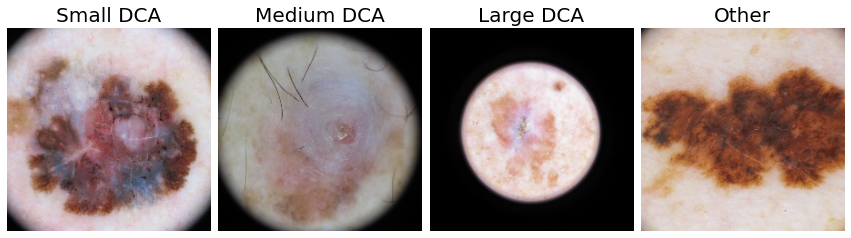

In [4]:
fig, axes = plt.subplots(1, 4, figsize = (15,15));
axes[0].imshow(small_dca);
axes[0].set_title("Small DCA", fontsize = 20)

axes[1].imshow(medium_dca);
axes[1].set_title("Medium DCA", fontsize = 20)

axes[2].imshow(large_dca);
axes[2].set_title("Large DCA", fontsize = 20)

axes[3].imshow(oth_dca);
axes[3].set_title("Other", fontsize = 20)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    
plt.subplots_adjust(wspace=0.04)
#fig.savefig(r'D:\OneDrive - MMU\Year 3\MMU Dissertation\Diss Figures\3_DCA_Examples')

## Display border types

In [5]:
bb_img = lesions_train.images[lesions_train.filenames == "ISIC2020_3152541_oth.jpg"][0]
dca_img = lesions_train.images[lesions_train.filenames == "ISIC2019_0053474_oth.jpg"][0]
ncd_img = lesions_train.images[lesions_train.filenames == "ISIC2020_9828846_mel.jpg"][0]

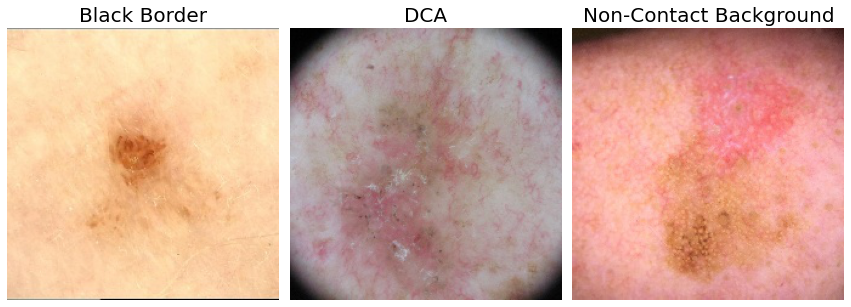

In [6]:
fig, axes = plt.subplots(1, 3, figsize = (15,15));
axes[0].imshow(bb_img);
axes[0].set_title("Black Border", fontsize = 20)


axes[1].imshow(dca_img);
axes[1].set_title("DCA", fontsize = 20)

axes[2].imshow(ncd_img);
#axes[2].title.set_text("Non-Contact Background")
axes[2].set_title("Non-Contact Background", fontsize = 20)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    
plt.subplots_adjust(wspace=0.04)

#fig.savefig(r'D:\OneDrive - MMU\Year 3\MMU Dissertation\Diss Figures\3_Border_Examples')

## Display contour identification process

In [7]:
# use annotations to get DCA images
t_mel_csv = pd.read_csv(r"../../Data/Annotations/train_mel.csv")
t_oth_csv = pd.read_csv(r"../../Data/Annotations/train_oth.csv")
v_mel_csv = pd.read_csv(r"../../Data/Annotations/val_mel.csv")
v_oth_csv = pd.read_csv(r"../../Data/Annotations/val_oth.csv")

# drop cols not needed
t_mel_csv = t_mel_csv.drop(['Other', 'Clinical_Markings', 'Air_Pockets', 'Measurement_Device', 'Hair', 'Borders'], axis = 1)
t_oth_csv = t_oth_csv.drop(['Other', 'Clinical_Markings', 'Air_Pockets', 'Measurement_Device', 'Hair', 'Borders'], axis = 1)
v_mel_csv = v_mel_csv.drop(['Other', 'Clinical_Markings', 'Air_Pockets', 'Measurement_Device', 'Hair', 'Borders'], axis = 1)
v_oth_csv = v_oth_csv.drop(['Other', 'Clinical_Markings', 'Air_Pockets', 'Measurement_Device', 'Hair', 'Borders'], axis = 1)


# drop rows that arent DCA's - DCA's are recorded as type 3, inverted DCA's are recorded as type 5
ind = t_mel_csv[(t_mel_csv['Border_Type'] != 3) & (t_mel_csv['Border_Type'] != 5)].index
t_mel_csv.drop(ind, inplace = True)

ind = t_oth_csv[(t_oth_csv['Border_Type'] != 3) & (t_oth_csv['Border_Type'] != 5)].index
t_oth_csv.drop(ind, inplace = True)

ind = v_mel_csv[(v_mel_csv['Border_Type'] != 3) & (v_mel_csv['Border_Type'] != 5)].index
v_mel_csv.drop(ind, inplace = True)

ind = v_oth_csv[(v_oth_csv['Border_Type'] != 3) & (v_oth_csv['Border_Type'] != 5)].index
v_oth_csv.drop(ind, inplace = True)

t_mel_csv = t_mel_csv.drop(['Border_Type'], axis = 1)
t_oth_csv = t_oth_csv.drop(['Border_Type'], axis = 1)
v_mel_csv = v_mel_csv.drop(['Border_Type'], axis = 1)
v_oth_csv = v_oth_csv.drop(['Border_Type'], axis = 1)


# append trains and vals together
mel_csv = t_mel_csv.append(t_oth_csv, ignore_index = True)
val_csv = v_mel_csv.append(v_oth_csv, ignore_index = True)

# append all together into one
annotated_borders = mel_csv.append(val_csv, ignore_index = True)

# transpose
mel_csv = mel_csv.transpose()
val_csv = val_csv.transpose()
annotated_borders = annotated_borders.transpose()

# convert from df to ndarrays for comparison against dataset filename ndarray
mel_csv.to_numpy()
val_csv.to_numpy()
annotated_borders.to_numpy()

array([['ISIC2017_0000030_mel.jpg', 'ISIC2017_0000031_mel.jpg',
        'ISIC2017_0000077_mel.jpg', ..., 'ISIC2020_8592827_oth.jpg',
        'ISIC2020_9169000_oth.jpg', 'ISIC2020_9828463_oth.jpg']],
      dtype=object)

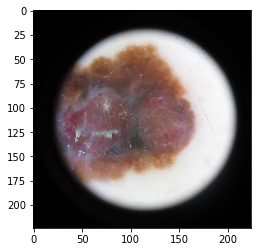

In [8]:
im1 = np.copy(lesions_train.images[lesions_train.filenames == mel_csv[1]['Image_Name']])[0]
im1_gray = cv.cvtColor(im1, cv.COLOR_RGB2GRAY)
im2 = np.copy(lesions_train.images[lesions_train.filenames == mel_csv[105]['Image_Name']])[0]
im2_gray = cv.cvtColor(im2, cv.COLOR_RGB2GRAY)
im3 = np.copy(lesions_train.images[lesions_train.filenames == mel_csv[999]['Image_Name']])[0]
im3_gray = cv.cvtColor(im3, cv.COLOR_RGB2GRAY)

plt.imshow(im1)
plt.imshow(im2)
plt.imshow(im3)

In [9]:
# set a threshold value and retrieve the binary threshold for the grayscale image
image_thresh = 100


ret,thresh_im1 = cv.threshold(im1_gray, image_thresh, 255, cv.THRESH_BINARY)
ret,thresh_im2 = cv.threshold(im2_gray, image_thresh, 255, cv.THRESH_BINARY)
ret,thresh_im3 = cv.threshold(im3_gray, image_thresh, 255, cv.THRESH_BINARY)

In [10]:
# find all of the contours in the threshold image
contours1, hierarchy1 = cv.findContours(thresh_im1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
img_contours1 = np.zeros(im1.shape)
contours2, hierarchy2 = cv.findContours(thresh_im2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
img_contours2 = np.zeros(im2.shape)
contours3, hierarchy3 = cv.findContours(thresh_im3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
img_contours3 = np.zeros(im3.shape)

# show all of the found contours
#plt.figure(figsize = (6,6))
#plt.imshow((cv.drawContours(img_contours1, contours1, -1, (0,255,0), 1)).astype(np.uint8));

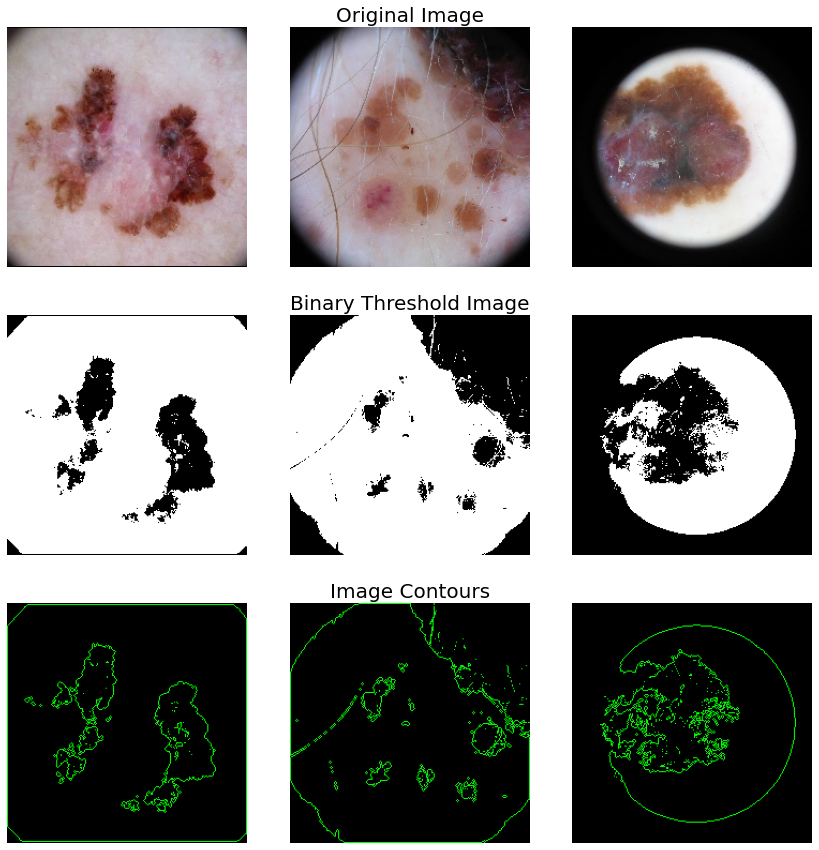

In [11]:
fig, axes = plt.subplots(3, 3, figsize = (15,15));
axes[0][0].imshow(im1);
axes[1][0].imshow(thresh_im1, cmap = 'gray');
axes[2][0].imshow((cv.drawContours(img_contours1, contours1, -1, (0,255,0), 1)).astype(np.uint8))


axes[0][1].imshow(im2);
axes[1][1].imshow(thresh_im2, cmap = 'gray');
axes[2][1].imshow((cv.drawContours(img_contours2, contours2, -1, (0,255,0), 1)).astype(np.uint8))

axes[0][2].imshow(im3);
axes[1][2].imshow(thresh_im3, cmap = 'gray');
axes[2][2].imshow((cv.drawContours(img_contours3, contours3, -1, (0,255,0), 1)).astype(np.uint8))

axes[0][1].set_title("Original Image",fontsize= 20)
axes[1][1].set_title("Binary Threshold Image",fontsize= 20)
axes[2][1].set_title("Image Contours",fontsize= 20)


for row in axes:
    for ax in row:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        #ax.yticks([], [])
    
plt.subplots_adjust(wspace=0.04, hspace=0.2)

In [12]:
#fig.savefig(r'D:\OneDrive - MMU\Year 3\MMU Dissertation\Diss Figures\4_Extract_Contours')

## Display Largest Contour and mask creation

In [13]:
# contour identification process needs running first as this relies on the data extracted during this phase

In [14]:
contoursB1 = []
big_contour1 = []
max1 = 0
for i in contours1:
    area = cv.contourArea(i) #--- find the contour having biggest area ---
    if(area > max1):
        max1 = area
        big_contour1 = i 
        contoursB1.append(i)
        
contoursB2 = []
big_contour2 = []
max2 = 0
for i in contours2:
    area = cv.contourArea(i) #--- find the contour having biggest area ---
    if(area > max2):
        max2 = area
        big_contour2 = i 
        contoursB2.append(i)
        
contoursB3 = []
big_contour3 = []
max3 = 0
for i in contours3:
    area = cv.contourArea(i) #--- find the contour having biggest area ---
    if(area > max3):
        max3 = area
        big_contour3 = i 
        contoursB3.append(i)
        


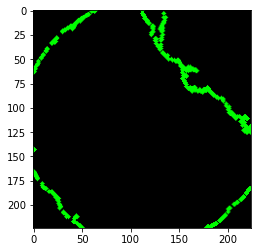

In [15]:
img_contours1 = np.zeros(im1.shape)

img_contours2 = np.zeros(im2.shape)

img_contours3 = np.zeros(im3.shape)

plt.imshow((cv.drawContours(img_contours2, big_contour2, -1, (0,255,0), 3)).astype(np.uint8));

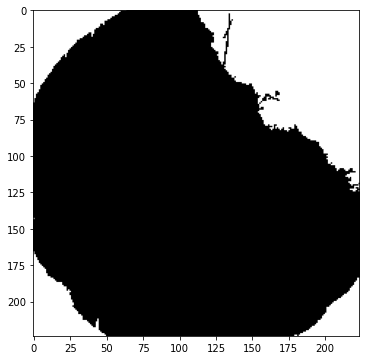

In [16]:
mask1 = np.ones(im1_gray.shape)
mask1 = cv.drawContours(mask1, contoursB1, -1, 0, cv.FILLED)

mask2 = np.ones(im2_gray.shape)
mask2 = cv.drawContours(mask2, contoursB2, -1, 0, cv.FILLED)

mask3 = np.ones(im3_gray.shape)
mask3 = cv.drawContours(mask3, contoursB3, -1, 0, cv.FILLED)

plt.figure(figsize = (6,6))
plt.imshow(mask2, cmap = 'gray');

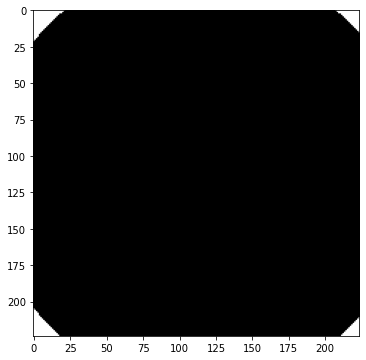

In [17]:
# find the minimum enclosing circle centre coordinates and radius
(x1,y1), radius1 = cv.minEnclosingCircle(big_contour1)
center1 = (int(x1), int(y1))

# negate from the radius to account for the 'transition zone' into the DCA
radius1 = int(radius1) - 2

# create the new masking circle using the centre point and the new radius
this_contour1 = cv.circle(np.ones(im1_gray.shape),center1,radius1,(0,255,0),-1)


# find the minimum enclosing circle centre coordinates and radius
(x2,y2), radius2 = cv.minEnclosingCircle(big_contour2)
center2 = (int(x2), int(y2))

# negate from the radius to account for the 'transition zone' into the DCA
radius2 = int(radius2) - 2

# create the new masking circle using the centre point and the new radius
this_contour2 = cv.circle(np.ones(im2_gray.shape),center2,radius2,(0,255,0),-1)



# find the minimum enclosing circle centre coordinates and radius
(x3,y3), radius3 = cv.minEnclosingCircle(big_contour3)
center3 = (int(x3), int(y3))

# negate from the radius to account for the 'transition zone' into the DCA
radius3 = int(radius3) - 2

# create the new masking circle using the centre point and the new radius
this_contour3 = cv.circle(np.ones(im3_gray.shape),center3,radius3,(0,255,0),-1)


# display the new mask
plt.figure(figsize = (6,6))
plt.imshow(this_contour1, cmap = 'gray');

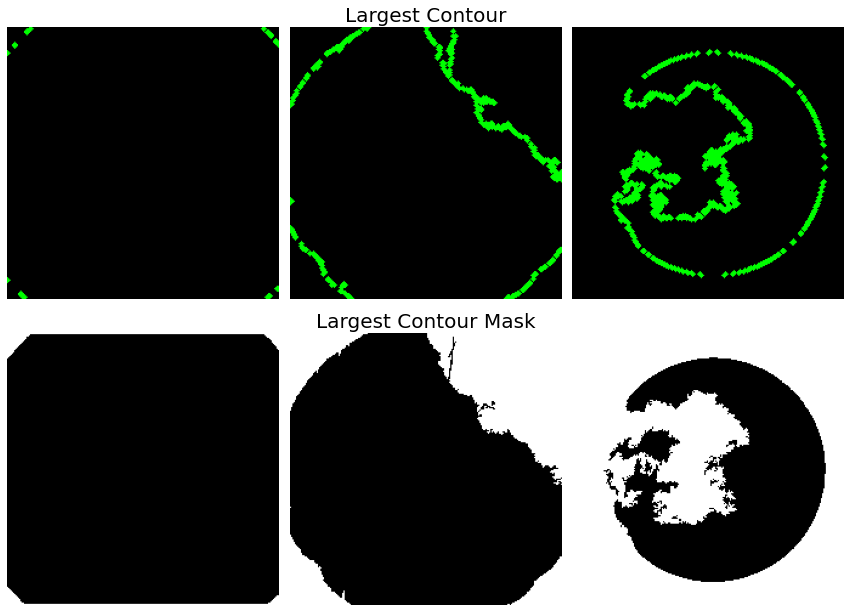

In [18]:
fig, axes = plt.subplots(2, 3, figsize = (15,15));
axes[0][0].imshow((cv.drawContours(img_contours1, big_contour1, -1, (0,255,0), 3)).astype(np.uint8));
axes[1][0].imshow(mask1, cmap = 'gray');
#axes[2][0].imshow(this_contour1, cmap = 'gray')


axes[0][1].imshow((cv.drawContours(img_contours2, big_contour2, -1, (0,255,0), 3)).astype(np.uint8));
axes[1][1].imshow(mask2, cmap = 'gray');
#axes[2][1].imshow(this_contour2, cmap = 'gray')

axes[0][2].imshow((cv.drawContours(img_contours3, big_contour3, -1, (0,255,0), 3)).astype(np.uint8));
axes[1][2].imshow(mask3, cmap = 'gray');
#axes[2][2].imshow(this_contour3, cmap = 'gray')

axes[0][1].set_title("Largest Contour",fontsize= 20)
axes[1][1].set_title("Largest Contour Mask",fontsize= 20)
#axes[2][1].set_title("Enclosed Contour Mask",fontsize= 20)


for row in axes:
    for ax in row:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)

    
plt.subplots_adjust(wspace=0.04, hspace=-0.4)

In [19]:
#fig.savefig(r'D:\OneDrive - MMU\Year 3\MMU Dissertation\Diss Figures\4_Largest_Contour_To_Mask')

## Min enclosing circle mask

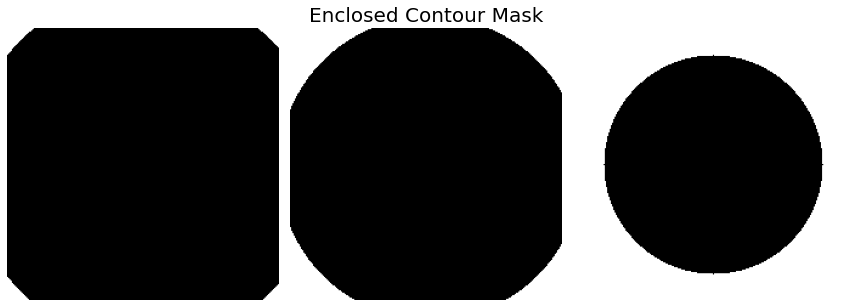

In [20]:
fig, axes = plt.subplots(1, 3, figsize = (15,15));

axes[0].imshow(this_contour1, cmap = 'gray')
axes[1].imshow(this_contour2, cmap = 'gray')
axes[2].imshow(this_contour3, cmap = 'gray')
axes[1].set_title("Enclosed Contour Mask",fontsize= 20)


for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

    
plt.subplots_adjust(wspace=0.04, hspace=-0.4)

In [21]:
#fig.savefig(r'D:\OneDrive - MMU\Year 3\MMU Dissertation\Diss Figures\4_Min_Enclosing_Mask')

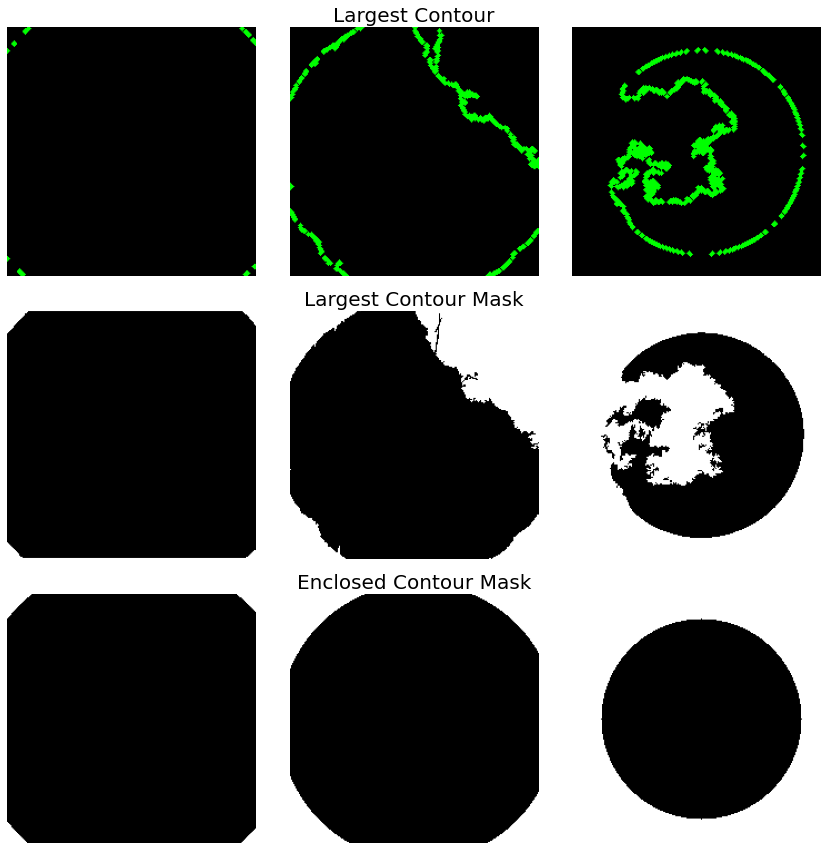

In [49]:
fig, axes = plt.subplots(3, 3, figsize = (15,15));
axes[0][0].imshow((cv.drawContours(img_contours1, big_contour1, -1, (0,255,0), 3)).astype(np.uint8));
axes[1][0].imshow(mask1, cmap = 'gray');
axes[2][0].imshow(this_contour1, cmap = 'gray')


axes[0][1].imshow((cv.drawContours(img_contours2, big_contour2, -1, (0,255,0), 3)).astype(np.uint8));
axes[1][1].imshow(mask2, cmap = 'gray');
axes[2][1].imshow(this_contour2, cmap = 'gray')

axes[0][2].imshow((cv.drawContours(img_contours3, big_contour3, -1, (0,255,0), 3)).astype(np.uint8));
axes[1][2].imshow(mask3, cmap = 'gray');
axes[2][2].imshow(this_contour3, cmap = 'gray')

axes[0][1].set_title("Largest Contour",fontsize= 20)
axes[1][1].set_title("Largest Contour Mask",fontsize= 20)
axes[2][1].set_title("Enclosed Contour Mask",fontsize= 20)


for row in axes:
    for ax in row:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)

    
plt.subplots_adjust(wspace=0.04, hspace=0.14)

#fig.savefig(r'D:\OneDrive - MMU\Year 3\MMU Dissertation\Diss Figures\4_Largest_Contour_Enclosing_Mask.png')

## Transpose the mask onto the original image

Requires both contour figures to have been run

In [23]:
output1 = im1.copy()
output1[this_contour1.astype(np.bool)] = 0

output2 = im2.copy()
output2[this_contour2.astype(np.bool)] = 0

output3 = im3.copy()
output3[this_contour3.astype(np.bool)] = 0

C:\Users\Sam\AppData\Local\Temp/ipykernel_16056/3590431825.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  output1[this_contour1.astype(np.bool)] = 0
C:\Users\Sam\AppData\Local\Temp/ipykernel_16056/3590431825.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  output2[this_contour2.astype(np.bool)] = 0
C:\Users\Sam\AppData\Local\Temp/ipykernel_

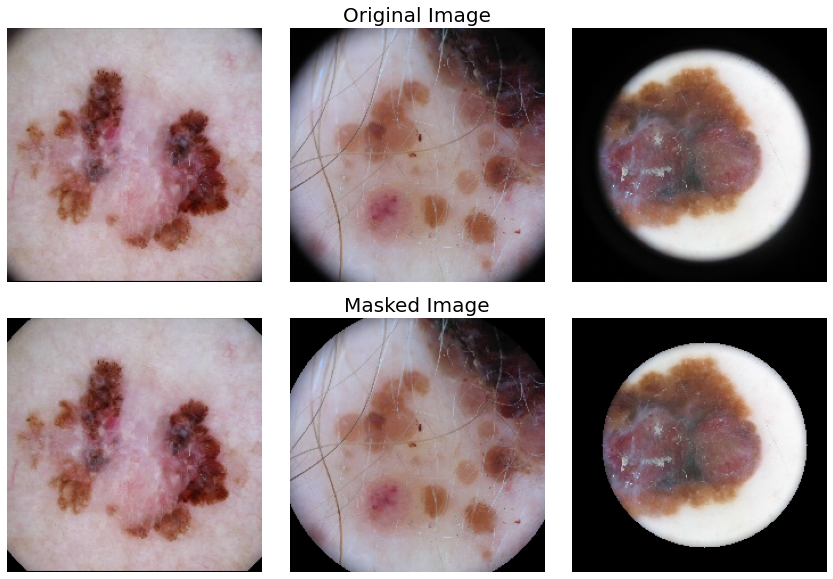

In [57]:
fig, axes = plt.subplots(2, 3, figsize = (15,10));
axes[0][0].imshow(im1);
axes[1][0].imshow(output1);


axes[0][1].imshow(im2);
axes[1][1].imshow(output2);

axes[0][2].imshow(im3);
axes[1][2].imshow(output3);

axes[0][1].set_title("Original Image",fontsize= 20)
axes[1][1].set_title("Masked Image",fontsize= 20)


for row in axes:
    for ax in row:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)

    
plt.subplots_adjust(wspace=0.04, hspace=0.14)


In [58]:
#fig.savefig(r'D:\OneDrive - MMU\Year 3\MMU Dissertation\Diss Figures\4_Masked_Comparison')

## Artifact types

In [26]:
hair = lesions_train.images[lesions_train.filenames == "ISIC2019_0012151_downsampled_mel.jpg"][0]
border = lesions_train.images[lesions_train.filenames == "ISIC2019_0054193_mel.jpg"][0]
measurement = lesions_train.images[lesions_train.filenames == "ISIC2017_0014920_mel.jpg"][0]
air = lesions_train.images[lesions_train.filenames == "ISIC2019_0031795_mel.jpg"][0]
markings = lesions_train.images[lesions_train.filenames == "ISIC2020_7410175_mel.jpg"][0]

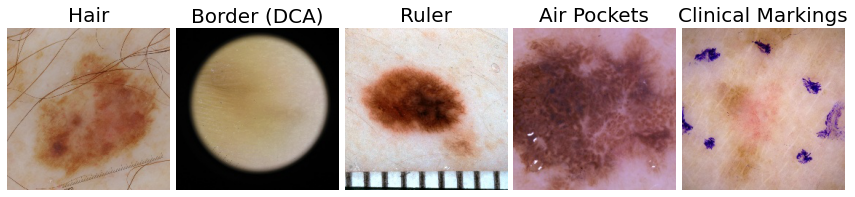

In [27]:
fig, axes = plt.subplots(1, 5, figsize = (15,15));

axes[0].imshow(hair)
axes[0].set_title("Hair",fontsize= 20)
axes[1].imshow(border)
axes[1].set_title("Border (DCA)",fontsize= 20)
axes[2].imshow(measurement)
axes[2].set_title("Ruler",fontsize= 20)
axes[3].imshow(air)
axes[3].set_title("Air Pockets",fontsize= 20)
axes[4].imshow(markings)
axes[4].set_title("Clinical Markings",fontsize= 20)



for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

    
plt.subplots_adjust(wspace=0.04, hspace=-0.4)

#fig.savefig(r'D:\OneDrive - MMU\Year 3\MMU Dissertation\Diss Figures\BAE_P.png')